# Auswertung eines Gravimetrieprofils

Der untenstehende Programmcode wertet Gravimetriedaten entlang eines Profils aus uns stellt die Freiluftanomalie und Bougueranomalie graphisch dar. Verändern Sie einzelne Parameter und sehen Sie sich das Ergebnis an und beantworten Sie die folgenden Fragen: 

3c. Ändern sie die Bouguerdichte auf 2500 kg/m^3. Was ändert sich und warum ? 
3d. Erhöhen Sie den letzten Messwert (g_obs) um 0.1 mGal. Was hat das für einen Einfluss auf die resultierenden Kurven. Welcher Paramter in der Auswertung ändert sich ?
3e. Ändern sie die Höhe des vierten Messpunktes auf 236m. Auf welche Anomalie hat das einen Einfluss ? 

In [2]:
"""Dieses Feld dient lediglich der Erstellung der Lösungsfunktion, für das Lösen der Aufgaben 
   benötigen Sie es nicht. WICHTIG: Dieses Feld muss unverändert bleiben, um korrekte Ergebnis-
   se zu bekommen. Falls Interesse besteht, diesen Programmierschritt nachzuvollziehen, machen
   Sie das erst nach dem Lösen der Aufgaben."""

import numpy as np
import matplotlib.pyplot as plt

def solve_model(t,x,h,phi,g_obs,rho):
    ns = len(t)
    G=6.67508e-11
    g_absolut = 981141.91;# % mGal
    ge = 9.780326771; 
    alpha = 0.001931851 ; 
    beta = 0.00669438; 
    g_drift = (g_obs[ns-1]-g_obs[0])/(t[ns-1]-t[0]);# %mGal/min
    delta_g_obs = g_obs - g_obs[0] - g_drift*(t-t[0]); #%mGal
    g0 = (ge*(1+alpha*np.sin(np.deg2rad(phi))**2)/np.sqrt((1-beta*np.sin(np.deg2rad(phi))**2))) * 100 * 10**3;# % mGal
    delta_gL = g0 - g_absolut; 
    delta_gF = -.3086*h; 
    delta_gB = 2*np.pi*G*rho*h*10**5; 
    Delta_gF = delta_g_obs - delta_gL - delta_gF
    Delta_gB = delta_g_obs - delta_gL - delta_gF - delta_gB 
    return [Delta_gF,Delta_gB]



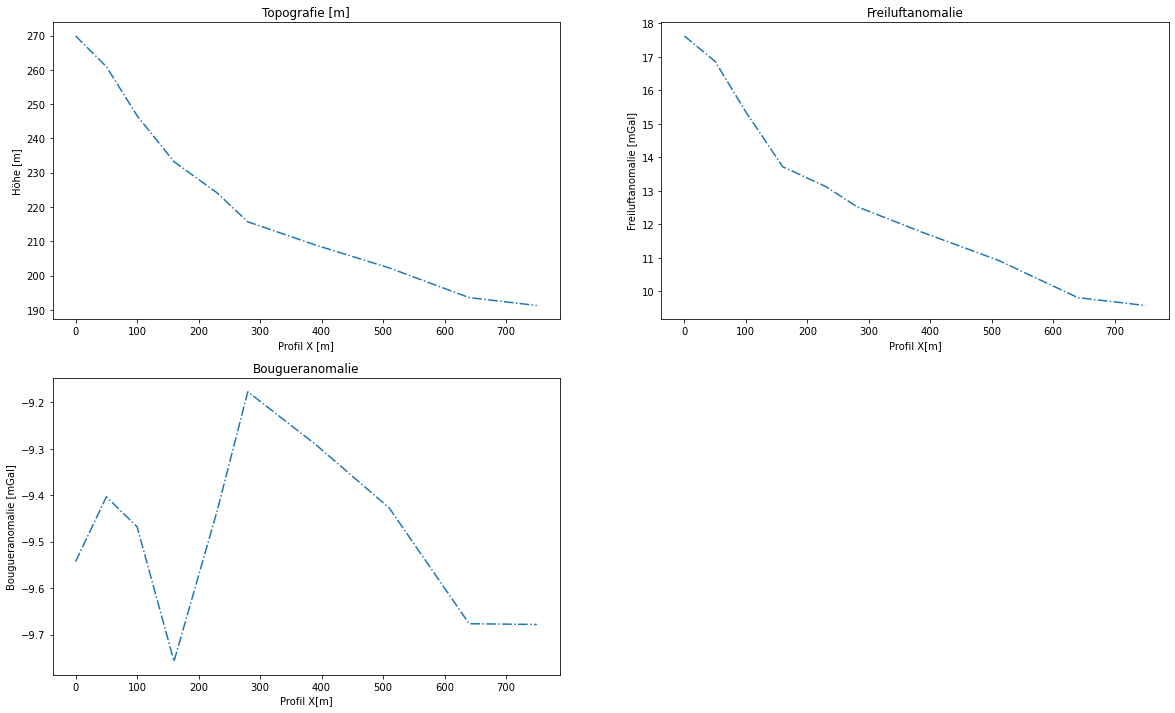

In [5]:
"""In diesem Feld werden die Plots der Topografie, der Freiluftanomalie und der Bougeranomalie 
   erstellt. Die Daten hierfür sind in sogenannten Arrays in den folgenden Variablen gespeich-
   ert. Hier nehmen Sie die geforderten Veränderungen aus Aufgabe 3 c, d und e vor. Betrachten 
   Sie jedoch zunächst die unveränderten Plots vor dem Ändern der Daten. Ausgeführt wird das 
   Programm mit der Tastenkombination 'Strg + enter' oder durch Klicken des Run-Buttons oben. 
   Dies muss sowohl einmalig in obiger Zelle sowie in dieser Zelle getan werden. 
   Falls Ihnen ein Fehler unterläuft oder ganze Zeilen aus Versehen gelöscht oder verändert werden,
   so können Sie mit 'Strg + Z' dies rückgängig machen."""


# Daten aus dem Blackboard
minute = np.array([44,50,56,3,8,12,16,21,25,29,44])
hour = np.array([14,14,14,15,15,15,15,15,15,15,15])
x = np.array([0,50,100,160,230,280,390,510,640,750,0])
h = np.array([269.91,260.97,246.64,233.22,224.15,215.69,208.93,202.24,193.59,191.27,269.91])
phi = np.array([51.5462,51.5458,51.5460,51.5458,51.5455,51.5450,51.5442,51.5435,51.5433,51.5432,51.5462])
g_obs = np.array([4485.21,4487.17,4490.10,4492.58,4494.76,4496.73,4497.95,4499.14,4500.67,4501.14,4485.18])

rho = 2400; # Bouguerdichte

"""Auch dieser Teil des Skripts sollte nicht geändert werden. Mit ihm werden die Plots erstellt
   und deren Aussehen definiert."""
t = hour*60 + minute
[Delta_gF,Delta_gB] = solve_model(t,x,h,phi,g_obs,rho)
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.plot(x[:-1],h[:-1],'-.')
plt.xlabel('Profil X [m]')
plt.ylabel('Höhe [m]')
plt.title('Topografie [m]')
plt.subplot(2,2,2)
plt.plot(x[:-1],Delta_gF[:-1],'-.')
plt.xlabel('Profil X[m]')
plt.ylabel('Freiluftanomalie [mGal]')
plt.title('Freiluftanomalie')
plt.subplot(2,2,3)
plt.plot(x[:-1],Delta_gB[:-1],'-.')
plt.xlabel('Profil X[m]')
plt.ylabel('Bougueranomalie [mGal]')
plt.title('Bougueranomalie')

plt.show()

